In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from scipy.stats import binned_statistic
import seaborn as sns

In [2]:
orig_df = pd.read_csv("bank-full.csv", sep=";")

In [3]:
orig_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
orig_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df = orig_df.copy()

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

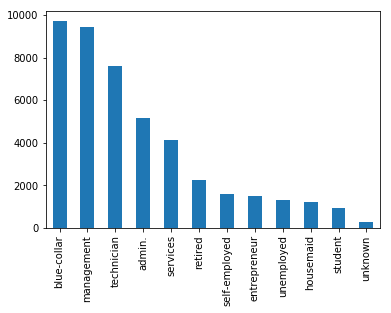

In [8]:
df.job.value_counts().plot(kind='bar')



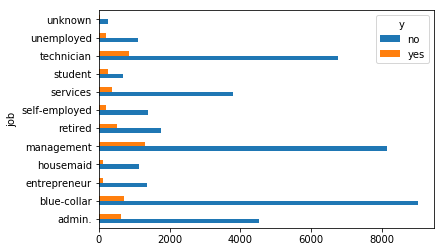

In [9]:
df.groupby('y').job.value_counts().unstack(0).plot.barh()

In [10]:
unemp_df = df[df['job']=="unemployed"]
unemp_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
134,28,unemployed,single,tertiary,no,0,yes,no,unknown,5,may,125,2,-1,0,unknown,no
142,57,unemployed,married,tertiary,no,42,no,no,unknown,5,may,46,1,-1,0,unknown,no
147,48,unemployed,married,secondary,no,293,yes,no,unknown,5,may,243,1,-1,0,unknown,no
176,48,unemployed,married,secondary,no,41,yes,no,unknown,5,may,179,2,-1,0,unknown,no
217,53,unemployed,married,unknown,no,13,no,no,unknown,5,may,410,3,-1,0,unknown,no


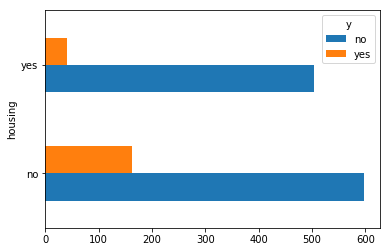

In [11]:
unemp_df.groupby('y').housing.value_counts().unstack(0).plot.barh()

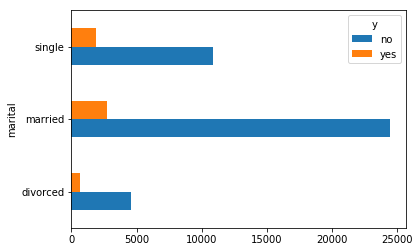

In [45]:
df.groupby('y').marital.value_counts().unstack(0).plot.barh()

In [13]:
df["balance"].max()

102127

In [14]:
unemp_df.balance.max()

44134

Wall time: 0 ns


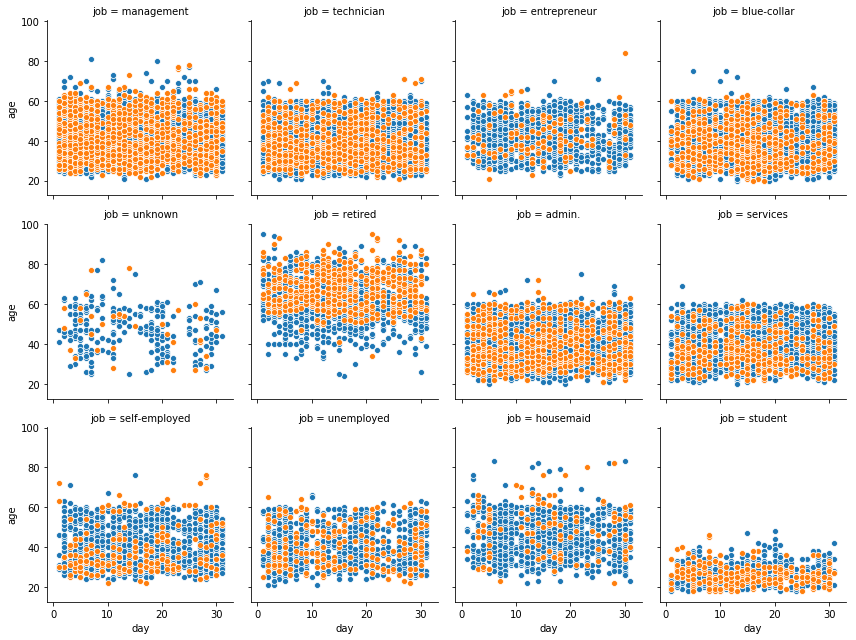

In [60]:
%time
cond_plot = sns.FacetGrid(data=df, col='job', hue='y', col_wrap=4)
cond_plot.map(sns.scatterplot , 'day', 'age');

In [86]:
cust_df = df[df['job']=="housemaid"]
cust_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
140,53,housemaid,divorced,primary,no,947,yes,no,unknown,5,may,163,1,-1,0,unknown,no
212,59,housemaid,divorced,primary,no,195,no,no,unknown,5,may,366,2,-1,0,unknown,no
218,46,housemaid,married,primary,no,965,no,no,unknown,5,may,177,1,-1,0,unknown,no
400,42,housemaid,married,primary,no,17,yes,no,unknown,6,may,124,1,-1,0,unknown,no
471,39,housemaid,single,primary,no,109,yes,no,unknown,6,may,699,3,-1,0,unknown,no


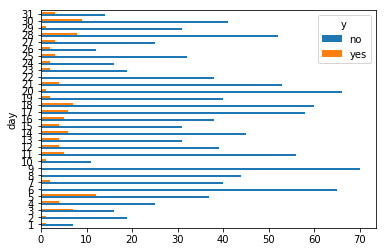

In [87]:
cust_df.groupby('y').day.value_counts().unstack(0).plot.barh()